In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pwai9ndG93bi1sb2NhbC9kc2FuNTY1MC93MTE='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_71028/3950950957.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap.py": 1694574412.6564615, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap_external.py": 1694574412.6611667, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/zipimport.py": 1694574410.7775924, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/codecs.py": 1694574410.2208612, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/aliases.py": 1694574411.6929739, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/__init__.py": 1694574411.687787, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/utf_8.py": 1694574412.1652963, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/abc.py": 1694574410.153477, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/io.py": 1694574410.3361063, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/stat.py": 1694574410.6048596, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/_collections_abc.py": 1694574410.109986, "/Users/jpj/.pyenv/versions

In [2]:
#| label: py-imports
#| fig-align: center
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cb_palette = ['#e69f00','#56b4e9','#009e73']
sns.set_palette(cb_palette)
import patchworklib as pw
import pymc as pm
import arviz as az
def draw_prior_sample(model, return_idata=False):
  with model:
    prior_idata = pm.sample_prior_predictive(draws=10_000, random_seed=5650)
  prior_df = prior_idata.prior.to_dataframe().reset_index().drop(columns='chain')
  if return_idata:
    return prior_idata, prior_df
  return prior_df
# Plotting function
def gen_dist_plot(dist_df, plot_title, size='third', custom_ylim=None):
  plot_width = 2
  if size == 'quarter':
    plot_width = 1.5
  plot_height = 0.625 * plot_width
  plot_figsize = (plot_width, plot_height)
  ax = pw.Brick(figsize=plot_figsize)
  sns.histplot(
    x="p_heads", data=dist_df, ax=ax,
    bins=25, alpha=0.8, stat='probability'
  );
  ax.set_xlim(0, 1);
  if custom_ylim is not None:
    ax.set_ylim(custom_ylim)
  ax.set_title(plot_title)
  return ax

<Figure size 96x96 with 0 Axes>

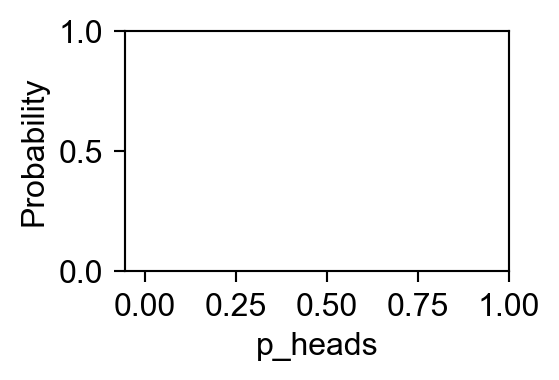

In [3]:
#| label: beta00-plot
#| fig-align: center
# b00_df = pd.DataFrame({'p_heads': np.arange(0, 1+1/25, 1/25)})
# b00_df['Probability'] = 0
ax = pw.Brick(figsize=(2, 1.25))
sns.histplot(
  x=[], ax=ax, # data=b00_df
);
ax.set_xlabel('p_heads');
ax.set_ylabel('Probability')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1]);
ax.set_ylim(0, 1);
ax.savefig()

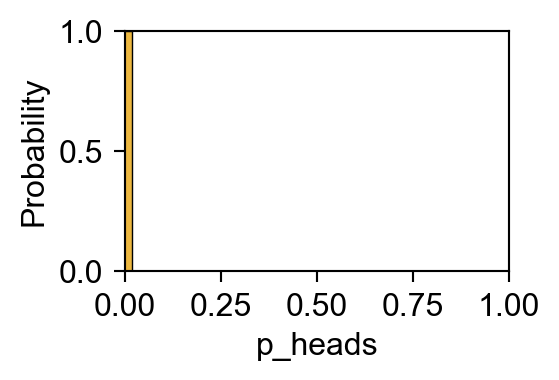

In [4]:
#| label: beta10-plot
#| fig-align: center
b10_df = pd.DataFrame({
  'draw': [0],
  'p_heads': [0],
})
ax = pw.Brick(figsize=(2, 1.25))
sns.histplot(
  x='p_heads', stat='probability', ax=ax,
  bins=25,
  data=b10_df
);
ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.savefig()

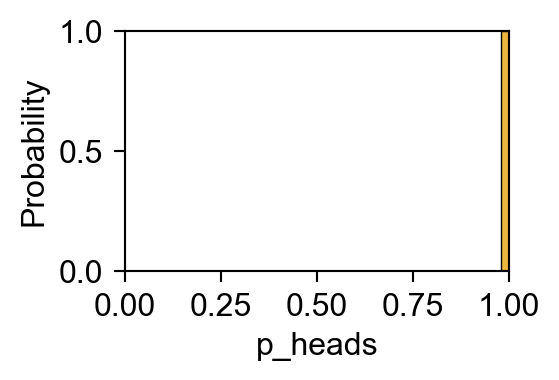

In [5]:
#| label: beta01-plot
#| fig-align: center
b01_df = pd.DataFrame({
  'draw': [0],
  'p_heads': [1],
})
ax = pw.Brick(figsize=(2, 1.25))
sns.histplot(
  x='p_heads', stat='probability', ax=ax,
  bins=25,
  data=b01_df
);
ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.savefig()

Sampling: [p_heads, result]


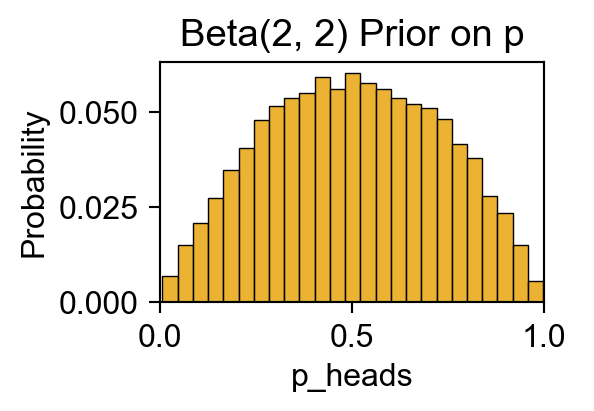

In [6]:
#| label: fig-informative-prior
#| fig-align: center
#| fig-cap: '*"I''ll start by assuming a **fair** coin"*'
# Informative Prior
with pm.Model() as informative_model:
  p_heads = pm.Beta("p_heads", alpha=2, beta=2)
  result = pm.Bernoulli("result", p=p_heads)
informative_df = draw_prior_sample(informative_model)
informative_plot = gen_dist_plot(informative_df, "Beta(2, 2) Prior on p");
informative_plot.savefig()

Sampling: [p_heads, result]


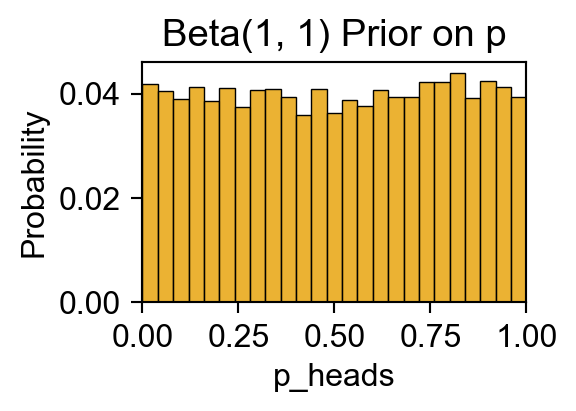

In [7]:
#| label: fig-weak-prior
#| fig-align: center
#| fig-cap: '*"I have no idea, I''ll assume all biases equally likely"*'
# Weakly Informative
with pm.Model() as weak_model:
  p_heads = pm.Beta("p_heads", alpha=1, beta=1)
  result = pm.Bernoulli("result", p=p_heads)
weak_df = draw_prior_sample(weak_model)
weak_plot = gen_dist_plot(weak_df, "Beta(1, 1) Prior on p");
weak_plot.savefig()

Sampling: [p_heads, result]


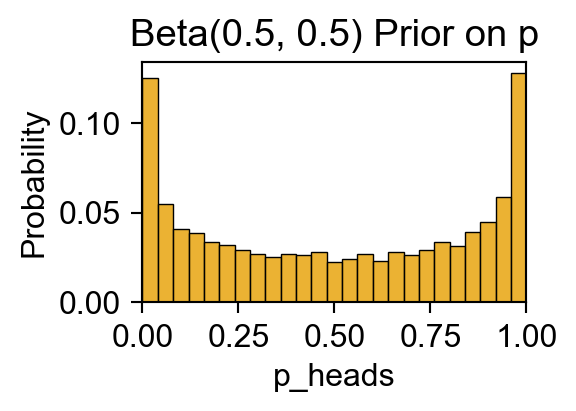

In [8]:
#| label: fig-skeptical-prior
#| fig-align: center
#| fig-cap: '*"I don''t trust this coin, it''ll take lots of flips with H/T balance to convince me it''s fair!"*'
# Skeptical / Jeffreys
with pm.Model() as skeptical_model:
  p_heads = pm.Beta("p_heads", alpha=0.5, beta=0.5)
  result = pm.Bernoulli("result", p=p_heads)
skeptical_df = draw_prior_sample(skeptical_model)
skeptical_plot = gen_dist_plot(skeptical_df, "Beta(0.5, 0.5) Prior on p");
# And combine
skeptical_plot.savefig()

Sampling: [p_heads, result]


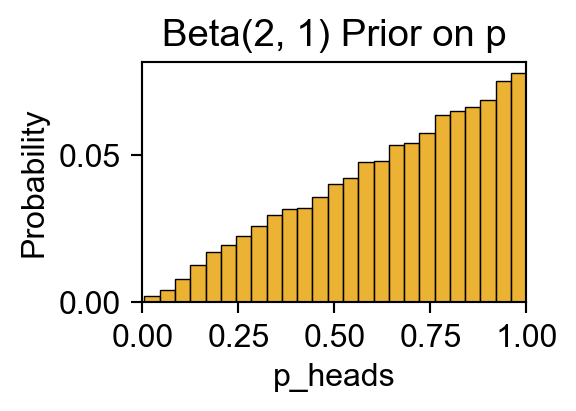

In [9]:
#| label: heads-more-likely
#| fig-align: center
with pm.Model() as heads_model:
  p_heads = pm.Beta("p_heads", alpha=2, beta=1)
  result = pm.Bernoulli("result", p=p_heads)
heads_df = draw_prior_sample(heads_model)
heads_plot = gen_dist_plot(heads_df, "Beta(2, 1) Prior on p");
heads_plot.savefig()

Sampling: [p_heads, result]


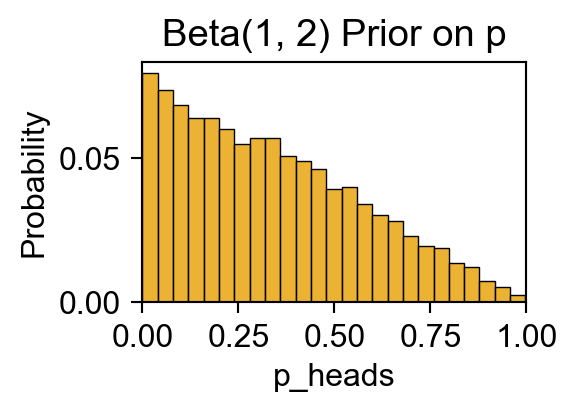

In [10]:
#| label: tails-more-likely
#| fig-align: center
with pm.Model() as tails_model:
  p_heads = pm.Beta("p_heads", alpha=1, beta=2)
  result = pm.Bernoulli("result", p=p_heads)
tails_df = draw_prior_sample(tails_model)
tails_plot = gen_dist_plot(tails_df, "Beta(1, 2) Prior on p");
tails_plot.savefig()

Sampling: [p_heads, result]


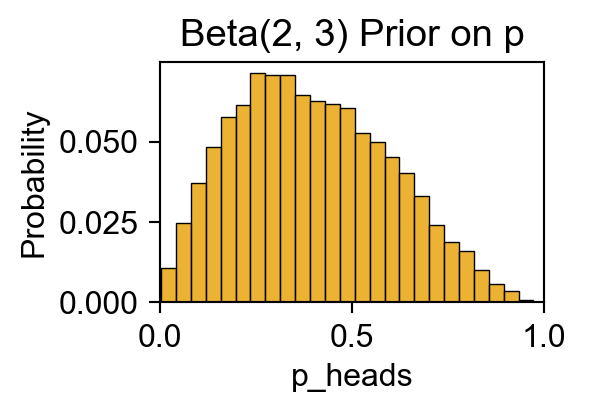

In [11]:
#| label: tails-very-likely
#| fig-align: center
with pm.Model() as beta23_model:
  p_heads = pm.Beta("p_heads", alpha=2, beta=3)
  result = pm.Bernoulli("result", p=p_heads)
beta23_df = draw_prior_sample(beta23_model)
beta23_plot = gen_dist_plot(beta23_df, "Beta(2, 3) Prior on p");
beta23_plot.savefig()

Sampling: [p_heads, result]


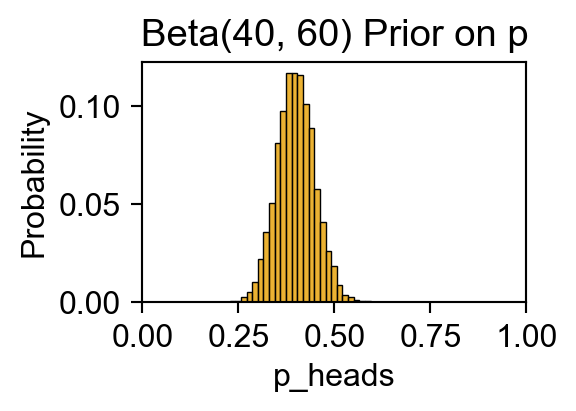

In [12]:
#| label: beta2030-model
#| fig-align: center
with pm.Model() as beta100_model:
  p_heads = pm.Beta("p_heads", alpha=40, beta=60)
  result = pm.Bernoulli("result", p=p_heads)
beta100_df = draw_prior_sample(beta100_model)
beta100_plot = gen_dist_plot(beta100_df, "Beta(40, 60) Prior on p");
beta100_plot.savefig()

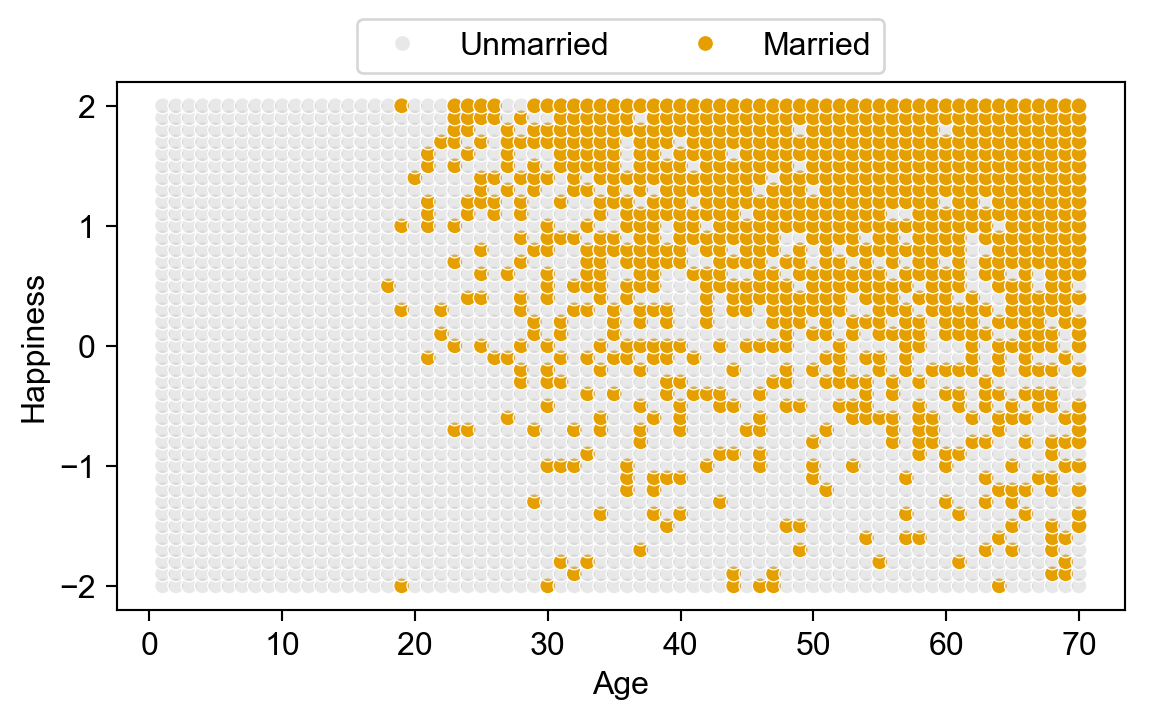

In [13]:
#| label: fig-happiness-plot
#| fig-align: center
#| fig-cap: Happiness by Age
import numpy as np
rng = np.random.default_rng(seed=5650)
from scipy.special import expit

# The original R code:
# sim_happiness <- function( seed=1977 , N_years=1000 , max_age=65 , N_births=20 , aom=18 ) {
#     set.seed(seed)
#     H <- M <- A <- c()
#     for ( t in 1:N_years ) {
#         A <- A + 1 # age existing individuals
#         A <- c( A , rep(1,N_births) ) # newborns
#         H <- c( H , seq(from=-2,to=2,length.out=N_births) ) # sim happiness trait - never changes
#         M <- c( M , rep(0,N_births) ) # not yet married
#         # for each person over 17, chance get married
#         for ( i in 1:length(A) ) {
#             if ( A[i] >= aom & M[i]==0 ) {
#                 M[i] <- rbern(1,inv_logit(H[i]-4))
#             }
#         }
#         # mortality
#         deaths <- which( A > max_age )
#         if ( length(deaths)>0 ) {
#             A <- A[ -deaths ]
#             H <- H[ -deaths ]
#             M <- M[ -deaths ]
#        }
#     }
#     d <- data.frame(age=A,married=M,happiness=H)
#     return(d)

# DGP: happiness -> marriage <- age
years = 70
num_births = 41
colnames = ['age','a','h','m']
sim_dfs = []
A = np.zeros(shape=(num_births,1))
H = np.linspace(-2, 2, num=num_births)
M = np.zeros(shape=(num_births,1))
def update_m(row):
  if row['m'] == 0:
    return int(rng.binomial(
      n=1,
      p=expit(row['h'] - 3.875),
      size=1,
    ))
  return 1
def sim_cohort_to(max_age):
  sim_df = pd.DataFrame({
      'age': [1 for _ in range(num_births)],
      'h': np.linspace(-2, 2, num=num_births),
      'm': [0 for _ in range(num_births)],
    }
  )
  for t in range(2, max_age + 1):
    sim_df['age'] = sim_df['age'] + 1
    if t >= 18:
      sim_df['m'] = sim_df.apply(update_m, axis=1)
  return sim_df
all_sim_dfs = []
for cur_max_age in range(1, 71):
  cur_sim_df = sim_cohort_to(cur_max_age)
  all_sim_dfs.append(cur_sim_df)
full_sim_df = pd.concat(all_sim_dfs)

# full_sim_df.head()
cbg_palette = ['#c6c6c666'] + cb_palette
full_sim_df['m_label'] = full_sim_df['m'].apply(lambda x: "Unmarried" if x == 0 else "Married")
full_sim_df = full_sim_df.rename(columns={'age': 'Age', 'h': 'Happiness'})
ax = pw.Brick(figsize=(5.25,2.75));
sns.scatterplot(
  x='Age', y='Happiness', hue='m_label',
  data=full_sim_df,
  ax=ax,
  palette=cbg_palette,
  sizes=2,
  legend=True,
);
ax.legend_.set_title("")
ax.move_legend("upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
ax.savefig()

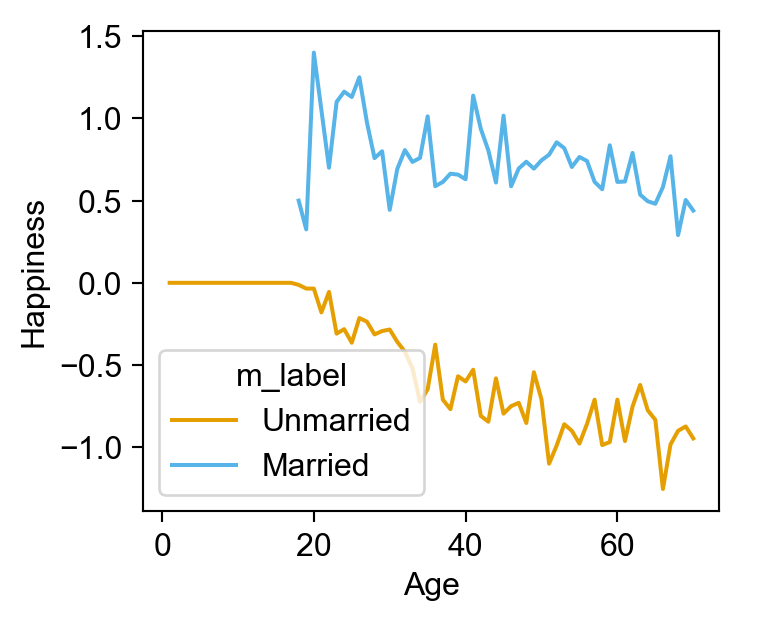

In [14]:
#| label: fig-mean-happiness-plot
#| fig-align: center
#| fig-cap: Mean happiness by age x marriage status
mean_hap_df = full_sim_df.groupby(['Age','m_label'])['Happiness'].mean().reset_index()
ax = pw.Brick(figsize=(3,2.5));
sns.lineplot(
  x='Age', y='Happiness', hue='m_label', data=mean_hap_df,
  ax=ax
);
ax.savefig()